In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
import plotnine

In [ ]:
from plotnine import ggplot, aes, geom_point 

In [ ]:
f_name = '/content/drive/MyDrive/Programming for Data Science/Semester Project/Data/lung_cancer.csv'

In [ ]:
lungCancer = pd.read_csv(f_name)

In [ ]:
lungCancer

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHONE,LADULT1,COLGSEX,NUMADULT,LANDSEX,NUMMEN,NUMWOMEN,RESPSLCT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,...,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWK1,_RFDRHV7,_FLSHOT7,_PNEUMO3,_RFSEAT2,_RFSEAT3,_DRNKDRV,_RFMAM22,_MAM5023,_RFPAP35,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,4.0,3.0,b'03172020',b'03',b'17',b'2020',1100.0,b'2020000564',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,3.0,NaN,1.000000e+00,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,10.0,88.0,3.0,1.0,1.0,2.0,1.0,...,1.0,2.0,13.0,2.0,80.0,6.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,3.0,9.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,4.0,7.0,b'07182020',b'07',b'18',b'2020',1100.0,b'2020001364',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,10.0,88.0,88.0,1.0,1.0,2.0,1.0,...,1.0,2.0,13.0,2.0,80.0,6.0,63.0,160.0,6713.0,2622.0,3.0,2.0,1.0,4.0,4.0,4.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,1.0,1.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,4.0,8.0,b'08292020',b'08',b'29',b'2020',1100.0,b'2020001448',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,30.0,88.0,1.0,1.0,2.0,1.0,...,1.0,2.0,9.0,1.0,60.0,5.0,65.0,165.0,5307.0,1947.0,2.0,1.0,1.0,2.0,9.0,1.0,2.0,9.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,2.0
3,4.0,8.0,b'08292020',b'08',b'29',b'2020',1100.0,b'2020001491',2.020001e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,3.0,NaN,1.000000e+00,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,1.0,2.0,2.0,1.0,...,1.0,2.0,13.0,2.0,80.0,6.0,64.0,163.0,7938.0,3004.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,4.0,12.0,b'12212020',b'12',b'21',b'2020',1200.0,b'2020001724',2.020002e+09,1.0,1.0,NaN,1.0,2.0,1.0,NaN,1.0,2.0,5.397605e-79,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,...,1.0,2.0,12.0,2.0,76.0,6.0,69.0,175.0,6804.0,2215.0,2.0,1.0,1.0,2.0,9.0,3.0,1.0,1.0,1.000000e+02,2.0,2.100000e+03,2.0,2.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,55.0,2.0,b'02242020',b'02',b'24',b'2020',1100.0,b'2020002140',2.020002e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,4.0,2.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,...,1.0,2.0,10.0,2.0,67.0,6.0,61.0,155.0,9072.0,3779.0,4.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,1.0,1.0,9.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
436,55.0,7.0,b'08062020',b'08',b'06',b'2020',1200.0,b'2020002778',2.020003e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,1.0,2.0,4.0,88.0,88.0,NaN,1.0,1.0,2.0,1.0,...,1.0,2.0,11.0,2.0,71.0,6.0,62.0,157.0,8618.0,3475.0,4.0,2.0,1.0,2.0,9.0,2.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,9.0,1.0,1.0,NaN,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
437,55.0,11.0,b'11232020',b'11',b'23',b'2020',1100.0,b'2020004687',2.020005e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,1.0,NaN,1.0,2.0,4.0,2.0,3.0,30.0,1.0,88.0,1.0,1.0,

In [ ]:
lungCancer_state = lungCancer._STATE.drop_duplicates()
lungCancer_state = list(lungCancer_state)

In [ ]:
cdc_state = {1: 'Alabama', 
             2: 'Alaska', 
             4: 'Arizona',
             5: 'Arkansas',
             6: 'California',
             8: 'Colorado',
             9: 'Connecticut',
             10: 'Delaware',
             11: 'District of Columbia',
             12: 'Florida',
             13: 'Georgia',
             15: 'Hawaii',
             16: 'Idaho',
             17: 'Illinois',
             18: 'Indiana',
             19: 'Iowa',
             20: 'Kansas',
             21: 'Kentucky',
             22: 'Louisiana',
             23: 'Maine',
             24: 'Maryland',
             25: 'Massachusetts',
             26: 'Michigan',
             27: 'Minnesota',
             28: 'Mississippi',
             29: 'Missouri',
             30: 'Montana',
             31: 'Nebraska',
             32: 'Nevada',
             33: 'New Hampshire',
             34: 'New Jersey',
             35: 'New Mexico',
             36: 'New York',
             37: 'North Carolina',
             38: 'North Dakota',
             39: 'Ohio',
             40: 'Oklahoma',
             41: 'Oregon',
             42: 'Pennsylvania',
             44: 'Rhode Island',
             45: 'South Carolina',
             46: 'South Dakota',
             47: 'Tennessee',
             48: 'Texas',
             49: 'Utah',
             50: 'Vermont',
             51: 'Virginia',
             53: 'Washington',
             54: 'West Virginia',
             55: 'Wisconsin',
             56: 'Wyoming',
             66: 'Guam',
             72: 'Puerto Rico'}

In [ ]:
cdc_abb = {
    'Alabama': 'AL', 
    'Alaska': 'AK', 
    'Arizona': 'AZ', 
    'Arkansas': 'AR', 
    'California': 'CA', 
    'Colorado': 'CO', 
    'Connecticut': 'CT', 
    'Delaware': 'DE', 
    'District of Columbia': 'DC', 
    'Florida': 'FL', 
    'Georgia': 'GA', 
    'Hawaii': 'HI', 
    'Idaho': 'ID', 
    'Illinois': 'IL', 
    'Indiana': 'IN', 
    'Iowa': 'IA', 
    'Kansas': 'KS', 
    'Kentucky': 'KY', 
    'Louisiana': 'LA', 
    'Maine': 'ME', 
    'Maryland': 'MD', 
    'Massachusetts': 'MA', 
    'Michigan': 'MI', 
    'Minnesota': 'MN', 
    'Mississippi': 'MS', 
    'Missouri': 'MO', 
    'Montana': 'MT', 
    'Nebraska': 'NE', 
    'Nevada': 'NV', 
    'New Hampshire': 'NH', 
    'New Jersey': 'NJ', 
    'New Mexico': 'NM', 
    'New York': 'NY', 
    'North Carolina': 'NC', 
    'North Dakota': 'ND', 
    'Ohio': 'OH', 
    'Oklahoma': 'OK', 
    'Oregon': 'OR', 
    'Pennsylvania': 'PA', 
    'Rhode Island': 'RI', 
    'South Carolina': 'SC', 
    'South Dakota': 'SD', 
    'Tennessee': 'TN', 
    'Texas': 'TX', 
    'Utah': 'UT', 
    'Vermont': 'VT', 
    'Virginia': 'VA', 
    'Washington': 'WA', 
    'West Virginia': 'WV', 
    'Wisconsin': 'WI', 
    'Wyoming': 'WY', 
    'Guam': 'GU', 
    'Puerto Rico': 'PR'
}

In [ ]:
# Name of states with response to lung cancer
print(len([cdc_state[x] for x in lungCancer_state]), '\n', [cdc_state[x] for x in lungCancer_state])

22 
 ['Arizona', 'Connecticut', 'Delaware', 'Georgia', 'Hawaii', 'Indiana', 'Louisiana', 'Massachusetts', 'Michigan', 'Mississippi', 'Missouri', 'Montana', 'New Jersey', 'New Mexico', 'North Carolina', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Wisconsin', 'Guam']


In [ ]:
LCS_state_counts = lungCancer['_STATE'].value_counts().rename_axis('abb').reset_index(name='counts')

In [ ]:
test = lungCancer['_STATE'].value_counts().to_frame(name = 'count').reset_index()

In [ ]:
for x in LCS_state_counts['abb']:
  print(cdc_abb[cdc_state[x]])

MO
CT
GA
IN
VT
MS
MA
SD
NM
MI
VA
HI
AZ
LA
RI
NJ
MT
WI
UT
DE
NC
GU


In [ ]:
LCS_state_counts['counts']

0     35
1     31
2     30
3     29
4     27
5     26
6     26
7     24
8     22
9     22
10    21
11    21
12    20
13    17
14    17
15    14
16    13
17    12
18    12
19    10
20     9
21     2
Name: counts, dtype: int64

In [ ]:
LCS_state_counts

,abb,counts
0,29.0,35
1,9.0,31
2,13.0,30
3,18.0,29
4,50.0,27
5,28.0,26
6,25.0,26
7,46.0,24
8,35.0,22
9,26.0,22


In [ ]:
state_df = pd.read_csv('/content/drive/MyDrive/Programming for Data Science/Semester Project/state_df.csv')

In [ ]:
fig = px.choropleth(state_df,  # Input Pandas DataFrame
                    locations=state_df['state'],  # DataFrame column with locations
                    color=state_df['value'],  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states', scope = 'usa') # Set to plot as US States

fig.show()

In [ ]:
lungCancer.notna()

,_SEX,_AGEG5YR,_EDUCAG,MARITAL,EMPLOY1,_INCOMG,DECIDE,DIFFWALK,DIFFALON,_RACEPRV,MENTHLTH,PHYSHLTH,POORHLTH,CSRVSUM,CSRVRTRN,CSRVINSR,CSRVPAIN
0,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True
3,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True
4,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True
436,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True
437,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
438,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
col_LS = list(lungCancer.columns)

In [ ]:
# FYI all of these columns are registered as float in Python, but the coded number has a certain meaning so refer to CDC codebook as needed
# For loop way
for column in col_LS:
  print('Numbers of NAs in column ' + column + ' ' + str(lungCancer[column].isna().sum()))

Numbers of NAs in column _STATE 0
Numbers of NAs in column _SEX 0
Numbers of NAs in column _AGEG5YR 0
Numbers of NAs in column _EDUCAG 0
Numbers of NAs in column MARITAL 0
Numbers of NAs in column EMPLOY1 0
Numbers of NAs in column _INCOMG 0
Numbers of NAs in column DECIDE 0
Numbers of NAs in column DIFFWALK 0
Numbers of NAs in column DIFFALON 0
Numbers of NAs in column _RACEPRV 0
Numbers of NAs in column MENTHLTH 0
Numbers of NAs in column PHYSHLTH 0
Numbers of NAs in column POORHLTH 139
Numbers of NAs in column CSRVSUM 242
Numbers of NAs in column CSRVRTRN 242
Numbers of NAs in column CSRVINSR 242
Numbers of NAs in column CSRVPAIN 43


In [ ]:
# Subset lungCancer without NaNs and 7
lungCancer.loc[(pd.notnull(lungCancer['CSRVSUM'])) & (lungCancer['CSRVSUM'] != 7), 'CSRVSUM']

21     2.0
22     1.0
23     1.0
24     1.0
26     1.0
      ... 
433    1.0
435    1.0
437    2.0
438    1.0
439    1.0
Name: CSRVSUM, Length: 186, dtype: float64

In [ ]:
# List comprehension way
[(print('Numbers of NAs in column ' + x + ' ' + str(lungCancer[x].isna().sum()))) for x in col_LS]

In [ ]:
LCS_state_counts

[ ] Update lungCancer csv with states/other variables

[ ] Update new dataframe into github

In [ ]:
lungCancer.groupby(['_SEX']).count()

In [ ]:
lungCancer.groupby(['_STATE', '_SEX']).count()

In [ ]:
lungCancer.groupby(['_AGEG5YR']).count()

In [ ]:
for s in lungCancer['_STATE']:
  print(cdc_state[s])

In [ ]:
for sex in lungCancer['_SEX']:
  if sex == 1:
    print('Male')
  else:
    print('Female')

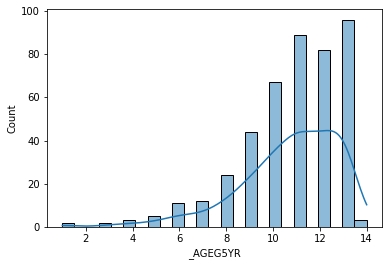

In [ ]:
sns.histplot(data=lungCancer, x='_AGEG5YR', kde=True)

iqr
mean by state vs overall
median by state vs overall
mode by state vs overall

proportion plot 
age sex
age race


In [ ]:
lungCancer.groupby(['_AGEG5YR', '_SEX']).count()

In [ ]:
lungCancer['_AGEG5YR'].mean()

In [ ]:
lungCancer.groupby(['_AGEG5YR', '_RACEPRV']).count()

In [ ]:
lungCancer.loc[(pd.notnull(lungCancer['CSRVRTRN'])) & (lungCancer['CSRVRTRN'] != 7), ['_EDUCAG']]

,_EDUCAG
21,4.0
22,4.0
23,3.0
24,3.0
26,2.0
...,...
433,2.0
435,2.0
437,2.0
438,2.0


In [ ]:
# PHYSHLTH, MENTHLTH, POORHLTH, WEIGHT2, HEIGHT3, ALCDAY5, DRNK3GE5, AVEDRNK3, 
# MAXDRNKS, FALL12MN, FALLINJ4, DRNKDRI2, CHKHEMO3, MARIJAN1, LCSFIRST, LCSLAST, 
# LCSNUMCG, CNCRAGE, DROCDY3_,  _DRNKWK1, 

# CNCRAGE vs. CSRVRTRN, 
sample = lungCancer.loc[(pd.notnull(lungCancer['CSRVRTRN'])) & (lungCancer['CSRVRTRN'] != 7) & (lungCancer['CSRVRTRN'] != 9), ['CSRVRTRN', '_INCOMG', 'CNCRAGE']]

In [ ]:
lungCancerSample = lungCancer.loc[(pd.notnull(lungCancer['CSRVINSR'])) & (lungCancer['CSRVINSR'] == 1) & (lungCancer['CSRVINSR'] == 2)]

In [ ]:
regList= ['PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'WEIGHT2', 'HEIGHT3', 'ALCDAY5', 'DRNK3GE5', 'AVEDRNK3', 'MAXDRNKS', 'FALL12MN', 'FALLINJ4', 'DRNKDRI2', 'CHKHEMO3', 'MARIJAN1', 'LCSFIRST', 'LCSLAST', 'LCSNUMCG', 'CNCRAGE', 'DROCDY3_', '_DRNKWK1']

In [ ]:
res = ['CSRVINSR']

In [ ]:
sample = []

In [ ]:
for var in varList:
  print(var, res[0])

PHYSHLTH CSRVINSR
MENTHLTH CSRVINSR
POORHLTH CSRVINSR
WEIGHT2 CSRVINSR
HEIGHT3 CSRVINSR
ALCDAY5 CSRVINSR
DRNK3GE5 CSRVINSR
AVEDRNK3 CSRVINSR
MAXDRNKS CSRVINSR
FALL12MN CSRVINSR
FALLINJ4 CSRVINSR
DRNKDRI2 CSRVINSR
CHKHEMO3 CSRVINSR
MARIJAN1 CSRVINSR
LCSFIRST CSRVINSR
LCSLAST CSRVINSR
LCSNUMCG CSRVINSR
CNCRAGE CSRVINSR
DROCDY3_ CSRVINSR
_DRNKWK1 CSRVINSR


In [ ]:
for var in regList: 
 sample.append(
     (ggplot(lungCancerSample, aes(var, res[0])) +
     geom_point())
     )

/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning:

geom_point : Removed 366 rows containing missing values.



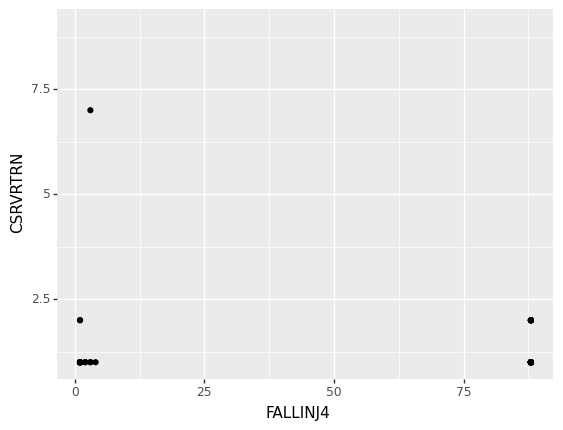

<ggplot: (8743820735981)>

In [ ]:
sample[10]

In [ ]:
(ggplot(sample, aes('CNCRAGE', 'CSRVRTRN')) +
 geom_point())

In [ ]:
(ggplot(sample, aes('PHYSHLTH', 'CSRVRTRN')) +
 geom_point())

In [ ]:
lungCancer.dtypes

In [ ]:
X = lungCancer.loc[(pd.notnull(lungCancer['CSRVRTRN'])) & (lungCancer['CSRVRTRN'] != 7), ['_AGEG5YR', '_INCOMG', '_RACEPRV']]

In [ ]:
y = lungCancer.loc[(pd.notnull(lungCancer['CSRVRTRN'])) & (lungCancer['CSRVRTRN'] != 7), 'CSRVSUM']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7) 

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(X_test)

array([1., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.,
       1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1., 1., 1., 2.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 2., 2.])

In [ ]:
model.score(X_test,y_test)

0.5481481481481482